# Lab 2: CIFAR-10 Challenge

In this lab you will experiment with whatever ConvNet architecture/design you'd like on [CIFAR-10 image dataset](https://www.cs.toronto.edu/~kriz/cifar.html). 

Date of submission: 2020-11-13

Group-3 & members:
- Name (ID): Abhinav Sharma (0753639)-sec:006
- Name (ID): Nishant Mahajan (0753638)-sec:001
- Name (ID): Prashanth Nuthula (0753653)-sec:005
- Name (ID): Sai Sahas Elluru (0753808)-sec:003
- Name (ID): Siddharth Singh (0756590)-sec:005



## Part 1: Creating the network (50% of grade)

**Goal:** After training, your model should achieve **at least 80%** accuracy on a **validation** set within 20 epochs. (Or as close as possible as long as there is demonstrated effort to achieve this goal.)

**Data split** The training set should consist of 40000 images, the validation set should consist of 10000 images, and the test set should consist of the remaining 10000 images. **Please use the Keras `load_data()` function to import the data set.**

**Implementation** All code should be in Keras/python. 

### Some things you can try:
- Different number/type of layers
- Different filter sizes 
- Adjust the number of filters used in any given layer
- Try various pooling strategies
- Consider using batch normalization
- Explore different numbers of layers in your network
- Check if adding regularization helps
- Consider alternative optimizers
- Try different activation functions


### Tips for training
When building/tuning your model, keep in mind the following points: 

- This is experimental, so be driven by results achieved on the validation set as opposed to what you have heard/read works well or doesn't
- If the hyperparameters are working well, you should see improvement in the loss/accuracy within a few hundred iterations (usually within one epoch)
- For hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all
- Once you have found some sets of hyperparameters that seem to work, search more finely around these parameters. You may need to train for more epochs.
- Prefer one validation to to cross-validation 
- Prefer random search to grid search for hyperparameters
- You should use the validation set for hyperparameter search and for evaluating different architectures
- The test set should only be used at the very end to evaluate your final model

### What to provide

The cell below should contain all the code necessary to run your final network on the cifar10 dataset as contained within Keras. All necessary hyperparameters should be visible either in the code or through comments. Your code should include 2 plots: one for training and validation loss per epoch and one for training and validation accuracy per epoch.  

Your network should produce an accuracy of at least 80% on the validation set within 20 epochs. (Or as close as possible as long as there is demonstrated effort to achieve this goal.)

You should also evaluate and report the accuracy on the test set. The test set should be used only once. That is, after you have decided on what to include in your network and tuned any hyperparameters for your final network, you should use this final network on the test set and calculate the accuracy.  

**Please make sure that all code has been run and the output is visible in the notebook before submitting.**

**Please note that I should be able to run the single code cell below and reproduce your results.**

**All code should be in ONE code cell.**

(10000, 32, 32, 3)
(10000, 10)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 10)
(10000, 10)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_32 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
___________________________

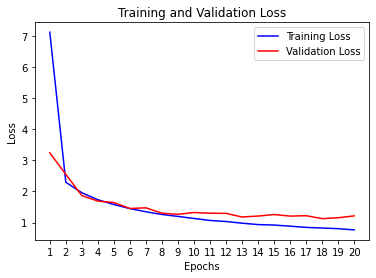

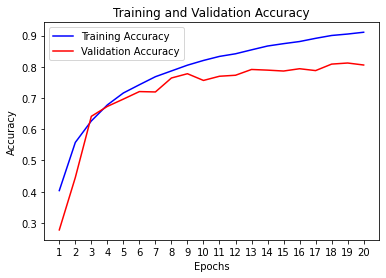

Testing accuracy of the model is  [1.2269357442855835, 0.800000011920929]


In [5]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
from keras import regularizers
from keras import initializers

#Data Preparation
(train_data , train_labels) , (x_test , y_test) = cifar10.load_data()

x_val = train_data[:10000]
y_val = train_labels[:10000]
x_train = train_data[10000:]
y_train = train_labels[10000:]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train, x_test = x_train/255, x_test/255
x_val = x_val/255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

#Shape of each subset of dataset
print(x_val.shape)
print(y_val.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#Build the neural network
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', input_shape=(32,32,3),kernel_initializer='he_normal' , activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', kernel_initializer='he_normal', activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding = "same",kernel_initializer='he_normal', activation = "relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding = 'same',kernel_initializer='he_normal', activation= "relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding = 'same',kernel_initializer='he_normal', activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding = 'same',kernel_initializer='he_normal', activation= "relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding = 'same',kernel_initializer='he_normal', activation= "relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding = 'same',kernel_initializer='he_normal', activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.002)))
model.add(BatchNormalization())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))

#summary of the model
model.summary()

#Compile the model
from keras.optimizers import Adam
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_val, y_val), verbose=1)
history.history.keys()
import matplotlib.pyplot as plt 

history_dict = history.history

loss_values = history_dict['loss']  
val_loss_values = history_dict['val_loss']

#Plotting loss & accuracy of training and validation datasets
epochs = range(1, len(loss_values)+1) 
# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

import matplotlib.pyplot as plt 

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Testing accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Testing loss and accuracy of the model is ', score)

## Part 2: Describe What you did (50% of grade)

All the work you did leading up to your final model from **Part 1** should be summarized in this section. This should be a logical and well-organized summary of the various experiments that were tried in **Part 1**. You should write an explanation of what you did and how you made decisions. Upon reading this section I should understand the reasoning that lead you to your final model. All references should be included in the noted section below. 

See [this guide](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook) for how to format markdown cells in Jupyter notebooks. For instance, it may be convenient to report your results in table format. 

Firstly, we are trying to build a Convolutional Neural Network to classify the images in CIFAR-10 dataset. This is a multi-class classification problem with 10 classes(10 types of images).
###Libraries
- keras.datasets is used to import the cifar10 dataset
- keras.utils is used to import the library to convert labels into categories
- keras.models is used to import the sequential model
- keras.layers is used to import the different types of layers used in the network (conv2d, dense, maxpooling2d, flatten, dropout, batchnormalization)
- Convolutional 2D layers are used to check for the certain patterns in the image using the filters. Each filter has its own weights and biases, these are learnable parameters. We also use activation function to determine which neuron should be activated. This is done by the weighted sum of the weights, inputs and biases. It also changes the dimensions of the images after this layer. 
- Batchnormalization layers are used to standardise the values into one range. It makes the model to learn more.
- Maxpooling 2D layer is used as a dimensionality reduction function.
- Genrally network tends to memorize the inputs from one layer to another this leads to overfitting of the model. To overcome this we use dropout to throw away some of the information from previous layer randomly, so that network tries harder to learn the patterns.
- Flatten layer is used to convert the image into 1D array.
- Dense layers are fully connected layers. Using activation function it calculates the weighted sum of the weights, inputs and biases of each neuron.
- Using keras we imported regularizers, intializers
- Regularizers are used to decrease the values of weights by multiplying them with lambda and adding it to the loss. This makes the loss go in decreasing rate.
- At the start of the training the network needs some weights to start the training process. Kernel_initialization is used to generate these weights statistically whether normal or uniform way.
- keras.optimizers is used to import the Adam optimizer
- Adam optimizer is used to update the weights and learning rate in the network. 
- we also imported matplotlib.pyplot to plot the graphs
###Data Preparation
- We first imported the cifar10 dataset into train_data, train_labels, x_test, and y_test(line:9)
- Next, we extracted the first 10000 samples from train data & labels(line:)
- Next, we extracted the remaining samples into x_train & y_train(line:)
- Next, we changed the type of x_train, x_test, and x_val to float and divided it with 255. It changes the range of the pixels to 0-1(line:).
- We then converted the labels in train, test, and val to 10 categories using keras.utils.to_categorically. This performs one-hot encodeing on the labels to convert them into binary form(line:)
- We are checking the shapes of data & labels of train,test, and validation sets using shape function(line:)


##Model
- First we created the variable for network and stored sequential model. Sequential model ensures the network runs in an order from input to output as well as recurrent steps(line:)
- Then we created a batch of 2 convolutional layers with 32 filters of size 3*3, padding = 'same', an he_normal kernel_initializers, and a ReLU activation function. We have also added batchnormalization layer after every conv2d layer. A maxpooling2d layer of 2*2 size at the end of the convolutional batch. For the first conv2d layer we have given input shape as 32*32*3, which is our image's height, width, and channels(line:)

- Then we created a batch of 3 convolutional layers with 64 filters of size 3*3, padding = 'same', an he_normal kernel_initializers, and a ReLU activation function. We have also added batchnormalization layer after every conv2d layer. A maxpooling2d layer of 2*2 size at the end of the convolutional batch. We have added a dropout layer after maxpooling layer with 0.2 cut off.(line:)

- Then we created a batch of 3 convolutional layers with 128 filters of size 3*3, padding = 'same', an he_normal kernel_initializers, and a ReLU activation function. We have also added batchnormalization layer after every conv2d layer. A maxpooling2d layer of 2*2 size at the end of the convolutional batch. We have added a dropout layer after maxpooling layer with 0.2 cut off.(line:)

- After all the conv2d batches we flattened the data so that it becomes into 1d array(line:).

- Then we added a dense layer of 128 neurons with a relu activation function and kernel_regualrizers L1 of 0.002. We added a batchnormalization layer(line:).

- Again we added a dense layer of 64 neurons with a relu activation function. We added a dropout layer of 0.2 cut off and a batchnormalization layer(line:).

- Finally the output layer is a dense layer with 10 neurons (which are 10 categories in the cifar10 dataset) with a softmax activation function.

###How we got this model
- We first tried out with simple convolutional layers which ahs less parameters than this. It had 3 batches of conv2d layers, which are in form of 3conv2d & maxpooling2d , 2conv2d & maxpooling2d, and 2conv2d & maxpooling2d. It also had 3 dense layers. We have got a graph with high loss and low accuracy with adam optimizer & categorical_crossentropy. 
- First we tried to increase the accuracy of the model by adding and deleting the convolutional layers and dense layers. And also tried changing filters & their shapes and activation function.
- Finally, we tried to duplicate the VGG-16 model, where vgg-16 has 5 batches of convolutional layers but we have used 3 batches of them.
- We have used ReLU or Rectified Linear Unit as our activation function. It takes the values between 0 and max from the input. It helps for easy back propagation of erros in the layers. Whenever there is a input with negative, ReLU converts them into 0 and not activates those neurons.
- We have used padding as 'same' in each conv2d layer. It ensures every pixel has same amount contribution while filtering. This method keeps the dimensions same as the original layer. This had little affect on the accuracy.
- Then we used he_normal as kernel initiliazer, which helps in weight initializing in the form of normal distribution. This step had major affect on accuracy, but we did not achieve 80%.
- Finally, we have used batchnormalization after every layer. Reason being this layer standardise the values from ouput layer to mean of zero and standard variance of 1. This layer adds 2 other parameters for each neuron.
- After this we finally got 80% accuracy. But the loss was increasing at the last 4 epochs out of 20 epochs.
- So, we haves used weight regularizers to multiply the weights by lamda and adding it to loss. It keeps the loss in one trend.
- We have used softmax activation in the final layer to convert the values into probabilities.


- 

###Compile

- We have compiled the model using optimizer as 'Adam', loss as 'categorical_crossentropy'. metrics as'accuracy'
- We then fit the model using x_train & y_train, with 20 epochs, 256 batch_size, validation data and verbose as 1.

###Evaluation

- Traing loss & accuracy and validation loss & accuracy is stored in history_dict.
- We then extract loss and accuracy of train & validation sets and store into respected variables.
- Using matplotlib.pyplot we have plotted loss of training and validation against x-axis epochs and y-axis loss(line:).
- Using matplotlib.pyplot we have plotted accuracy of training and validation against x-axis epochs and y-axis loss(line:).
- Finally, using model.evaluate we have evaluated the accuracy of x_test & y_test.

### References

Please include all references used in completing this lab: books, tutorials, blogs, github, etc.

<ol>
<li>Reference details and link</li>
References for documentation and example code:

https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/

https://keras.io/api/layers/convolution_layers/convolution2d/

https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75

https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d

https://medium.com/@phuctrt/activation-functions-when-to-use-them-and-how-could-they-perform-e428f7340e6d

https://medium.com/@nishantnikhil/adam-optimizer-notes-ddac4fd7218

https://datascience.stackexchange.com/questions/37378/what-are-kernel-initializers-and-what-is-their-significance

https://www.machinecurve.com/index.php/2020/01/14/what-is-batch-normalization-for-training-neural-networks/

References for basic model building:

Practice labs from class and VGG-16 from class notes

References for increasing accuracy:

https://keras.io/api/layers/normalization_layers/batch_normalization/

https://keras.io/api/layers/initializers/

https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

https://keras.io/api/layers/regularization_layers/dropout/

References for decreasing loss:

https://keras.io/api/layers/regularizers/

https://towardsdatascience.com/regularization-techniques-and-their-implementation-in-tensorflow-keras-c06e7551e709


